# ELM with RandomizedserchCV to find the optimal number of hidden nodes in the network

In [1]:
def compute(X,y,weights,bias,H,beta):
    Psudo_inv_H=0
    X=np.matrix(X)
    print("X matrix shape ",X.shape)
    y=np.matrix(y)
    print("y matrix shape",y.shape)
    H=np.dot(X,weights)+bias
    print("ouput of h ",H)
    print("H matrix shape",H.shape)
    H=sigmoid(H)
    print("ouput of h after sigmoid function ",H)
    #calculating psudo inverse of H
    Psudo_inv_H=np.linalg.pinv(H)
    print("inverse matrix shape",Psudo_inv_H.shape)
    # calculate beta matrix
    #print("shape of y ",y.shape)
    beta=np.dot(Psudo_inv_H,y)
    print("beta matrix shape",beta.shape)
    
    return H,beta
# kam ka nhi h 
def predict2(H,beta,x_test):
    print("beta matrix is \n",beta)
    #x_test=np.matrix(x_test)
    #print("x_test shape",x_test.shape)
    out=softmax(np.dot(H,weights)+bias)*beta
    out2=softmax(np.dot(H,beta))
    print("output is",out)
    print("output2 is",out2)
    print("output matrix shape",out.shape)
    
    # Calculate the predicted output
    y_pred = np.argmax(np.dot(out, beta.T), axis=1)

    # Print the accuracy of the model
    accuracy = (y_pred == x_test).mean()
    print("Accuracy:", accuracy)
    return out

    




def predict(H,beta,x_test):
    print(beta)
    #x_test=np.matrix(x_test)
    #print("x_test shape",x_test.shape)
    out=sigmoid(np.dot(x_test,weights)+bias)*beta
    print("output is",out)
    print("output matrix shape",out.shape)
    
    # Calculate the predicted output
    y_pred = np.argmax(np.dot(out, beta), axis=1)

    # Print the accuracy of the model
    accuracy = (y_pred == x_test).mean()
    print("Accuracy:", accuracy)
    return out

    


# start from here

# this code runs perfectly but randomized cv is not working on it

In [2]:
import numpy as np
class salman():
   
    
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.weights=np.matrix(np.random.rand(self.hidden_size,self.input_size))
        print("weight matrix\n",self.weights)
        print("weight matrix shape",self.weights.shape)

        self.bias=np.ones(self.hidden_size)
        self.bias2=np.ones(self.output_size)
        print("bias matris",self.bias)
        print("bias2 matrix",self.bias2)
        #print("shape of bias",bias.shape)
        #return weights,bias,bias2,H,beta
        #H=0,beta=0
        #obj.compute2(self,X,y,weights,bias,H,beta,bias2)
        #print("output is\n",output)

    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def softmax(self,x):
        exps=np.exp(x-np.max(x,axis=1))
        return exps/np.sum(exps,axis=1)

    def compute2(self,X,y):
        Psudo_inv_H=0
        X=np.matrix(X)
        print("X matrix shape ",X.shape)
        y=np.matrix(y)
        print("y matrix shape",y.shape)
        print("bias",self.bias)
        H=np.dot(X,self.weights.T)+self.bias
        print("ouput of h ",H)
        print("H matrix shape",H.shape)
        H=self.sigmoid(H)
        print("shape of h after sigmoid",H.shape)
        print("ouput of h after sigmoid function ",H)
        #calculating psudo inverse of H
        Psudo_inv_H=np.linalg.pinv(H)
        print("inverse matrix shape",Psudo_inv_H.shape)
        # calculate beta matrix
        #print("shape of y ",y.shape)
        self.beta=np.dot(Psudo_inv_H,y)
        print("beta matrix shape",beta.shape)
        output=self.softmax(np.dot(H,self.beta)+self.bias2)

        return H,beta,output
    
    

    
    def accuracy_find(self,output,y_train):
        from sklearn.metrics import accuracy_score, mean_absolute_error

        # Assuming you have the predicted output 'y_pred' and the actual target 'y_true'
        y_pred = output.argmax(axis=1)
        y_true = y_train.argmax(axis=1)

        # Calculate accuracy
        accuracy = accuracy_score(y_true, y_pred)
        print(" Training accuracy Accuracy:", accuracy)

        # Calculate mean absolute error
        mae = mean_absolute_error(y_true, y_pred)
        print("Mean Absolute Error:", mae)
        
    def predict(self,X):
        output=self.sigmoid(np.dot(X,self.weights.T)+self.bias)
        x=np.dot(output,self.beta)+self.bias2
        output=self.softmax(x)
        return output
    def create_salman(hidden_size):
        return hidden_size





In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()
x=iris.data
y=iris.target
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_data=scalar.fit_transform(x)

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe_data=ohe.fit_transform(y.reshape(-1,1)).toarray()
ohe_data

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_data,ohe_data,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 3)
(45, 3)


In [4]:
obj=salman(input_size=4,hidden_size=10,output_size=3)

weight matrix
 [[0.65519389 0.57678873 0.24220243 0.57830063]
 [0.33857178 0.64409521 0.74684616 0.79899678]
 [0.55529537 0.22061654 0.85474701 0.31852274]
 [0.0326534  0.25428948 0.77133227 0.16398349]
 [0.25966474 0.47886507 0.06140855 0.42118456]
 [0.7239457  0.61664459 0.27224334 0.58848421]
 [0.55889303 0.43242149 0.19817371 0.98391497]
 [0.44064015 0.95952213 0.05862904 0.75311206]
 [0.89696912 0.89840092 0.96053349 0.86084039]
 [0.24281163 0.96318668 0.36625565 0.88993778]]
weight matrix shape (10, 4)
bias matris [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
bias2 matrix [1. 1. 1.]


In [5]:
H,beta,output=obj.compute2(x_train,y_train)

X matrix shape  (105, 4)
y matrix shape (105, 3)
bias [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
ouput of h  [[ 4.59202399  4.90845747  4.38020026 ...  4.62024879  7.12081565
   4.73967254]
 [-0.10473059 -0.67888734 -0.91382614 ...  0.55403782 -1.36209259
   0.1681729 ]
 [-0.40693094 -0.92723493 -1.31984946 ...  0.45222024 -1.86711601
   0.09261595]
 ...
 [ 2.74991128  2.98813088  3.34825563 ...  2.03537197  4.23220954
   2.19574756]
 [ 0.99227435  1.12431936  1.49992659 ...  0.60069437  1.26180001
   0.7018254 ]
 [-0.54129312 -0.94880325 -1.18516556 ...  0.12292554 -1.94904267
  -0.1504164 ]]
H matrix shape (105, 10)
shape of h after sigmoid (105, 10)
ouput of h after sigmoid function  [[0.9899693  0.99267025 0.98763203 ... 0.99024574 0.99919255 0.99133424]
 [0.47384126 0.33650968 0.28621753 ... 0.63507189 0.20390041 0.54194442]
 [0.39964825 0.28348602 0.21084334 ... 0.61116699 0.13387578 0.52313745]
 ...
 [0.93990834 0.95203503 0.96604767 ... 0.88446117 0.98568755 0.89986699]
 [0.72953691 0.754

NameError: name 'beta' is not defined

In [ ]:
output

In [6]:
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [7]:
#####training accuracy 
obj.accuracy_find(output,y_train)

NameError: name 'output' is not defined

# this is also a testing accuracy of the model with output=(h*beta)+bias2

In [8]:
### testing accuracy 
H,beta,output=obj.compute2(x_test,y_test)
obj.accuracy_find(output,y_test)

X matrix shape  (45, 4)
y matrix shape (45, 3)
bias [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
ouput of h  [[ 3.92196059e-01  4.07568323e-01  8.56432950e-01  8.36816058e-01
   4.91049043e-01  3.50768223e-01  5.43537384e-01 -2.45639710e-02
   1.39970759e-01  2.43983722e-02]
 [ 3.85903903e-01  6.36551044e-01  1.39945975e+00  1.11374461e+00
   3.14269696e-01  3.45534274e-01  7.81990491e-01 -4.70572089e-01
   4.15987915e-01 -2.44045881e-01]
 [ 1.61084975e+00  2.13964599e+00  1.91282265e+00  1.68667805e+00
   1.33448683e+00  1.64127603e+00  1.91041516e+00  1.54380130e+00
   2.35631312e+00  1.87256321e+00]
 [ 2.39011594e+00  2.29695748e+00  2.39247875e+00  1.58556906e+00
   1.66531948e+00  2.51833546e+00  2.29130365e+00  2.16300036e+00
   3.29381910e+00  2.08779286e+00]
 [ 3.55811832e+00  3.82843498e+00  3.81938931e+00  2.30422876e+00
   2.21293151e+00  3.76227070e+00  3.88958420e+00  3.03383918e+00
   5.42513624e+00  3.19603320e+00]
 [ 2.11556490e+00  2.68116766e+00  2.55829149e+00  1.89493226e+00
   

NameError: name 'beta' is not defined

# test accuracy with out=sigmoid(x*weights)+bias1 then output=(out*beta)+bias2

In [9]:
output=obj.predict(x_test)
output
# Actually this one is test accuracy it shows trainign because in accuracy find function it's defined like that
obj.accuracy_find(output,y_test)

 Training accuracy Accuracy: 0.8888888888888888
Mean Absolute Error: 0.1111111111111111


C:\Users\salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('Infosys_new_data.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5285 non-null   object 
 1   Open       5285 non-null   float64
 2   High       5285 non-null   float64
 3   Low        5285 non-null   float64
 4   Close      5285 non-null   float64
 5   Adj Close  5285 non-null   float64
 6   Volume     5285 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 289.1+ KB


In [80]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5285 non-null   datetime64[ns]
 1   Open       5285 non-null   float64       
 2   High       5285 non-null   float64       
 3   Low        5285 non-null   float64       
 4   Close      5285 non-null   float64       
 5   Adj Close  5285 non-null   float64       
 6   Volume     5285 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 289.1 KB


In [82]:
df=df.set_index('Date')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5285 entries, 2002-07-05 to 2023-07-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5285 non-null   float64
 1   High       5285 non-null   float64
 2   Low        5285 non-null   float64
 3   Close      5285 non-null   float64
 4   Adj Close  5285 non-null   float64
 5   Volume     5285 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 289.0 KB


In [85]:
df_new=df.Close
df_new=np.array(df_new)
#df_new.shape


In [86]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df_new.reshape(-1,1))
scaled_data.shape

(5285, 1)

In [87]:
scaled_data

array([[0.01660087],
       [0.01754056],
       [0.01854288],
       ...,
       [0.58704501],
       [0.59386077],
       [0.59666722]])

In [88]:
x=scaled_data
window=30
days = 7
ln = (len(x)-window)%(days)
x = x[0:len(x)-ln]

def independet_prep(window,x):
    independent_features = []
    for i in range(window, len(x), days):
        independent_features.append(x[i-window:i])

    independent_features = np.array(independent_features)
    return independent_features


def dependent_prep(window,x):
    dependent_features = []
    for i in range(window, len(x), days):
        dependent_features.append(x[i:i+days])
        
    dependent_features = np.array(dependent_features)
    #here dependent_features[1: ] to all because the response at first index i don't want 
    return dependent_features

x2=independet_prep(window,x)
y2=dependent_prep(window,x)
#cls = x[window:,3]
y1=y2.reshape(y2.shape[0],y2.shape[1])
x1=x2.reshape(x2.shape[0],x2.shape[1])


'''def train_test_split_data(scaled_data,):
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    time_step=50
    length_train=round(len(scaled_data)*0.7)
    test_length=len(scaled_data[length_train:])
    test_scaled_data=scaled_data[length_train:]
    print("training length",length_train)
    print("test_data_length",test_length)
    for i in range(time_step,length_train):
        x_train.append(scaled_data[i-time_step:i,0])
        y_train.append(scaled_data[i,0])
    x_train,y_train=np.array(x_train),np.array(y_train)
    for i in range(time_step,test_length):
        x_test.append(test_scaled_data[i-time_step:i,0])
        y_test.append(test_scaled_data[i,0])
    x_test,y_test=np.array(x_test),np.array(y_test)
    return x_train,y_train,x_test,y_test
    '''

'def train_test_split_data(scaled_data,):\n    x_train=[]\n    y_train=[]\n    x_test=[]\n    y_test=[]\n    time_step=50\n    length_train=round(len(scaled_data)*0.7)\n    test_length=len(scaled_data[length_train:])\n    test_scaled_data=scaled_data[length_train:]\n    print("training length",length_train)\n    print("test_data_length",test_length)\n    for i in range(time_step,length_train):\n        x_train.append(scaled_data[i-time_step:i,0])\n        y_train.append(scaled_data[i,0])\n    x_train,y_train=np.array(x_train),np.array(y_train)\n    for i in range(time_step,test_length):\n        x_test.append(test_scaled_data[i-time_step:i,0])\n        y_test.append(test_scaled_data[i,0])\n    x_test,y_test=np.array(x_test),np.array(y_test)\n    return x_train,y_train,x_test,y_test\n    '

In [89]:
x1.shape,y1.shape

((750, 30), (750, 7))

In [90]:
training_size=round(len(x1)*0.7)
val_size=round(len(x1)*0.5)
x_train,y_train=x1[:training_size],y1[:training_size]
x_val,y_val=x1[val_size:training_size],y1[val_size:training_size]
x_test,y_test=x1[training_size:],y1[training_size:]
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(525, 30)
(525, 7)
(150, 30)
(150, 7)
(225, 30)
(225, 7)


#  from here i made the code run on any number of hidden nodes and with randomized searchCV to find the optimal no of hidden nodes

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.metrics import mean_absolute_error
import numpy as np
class salman(BaseEstimator,ClassifierMixin):
   
    
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.weights=np.matrix(np.random.rand(self.input_size,self.hidden_size))
       
        print("weight matrix shape",self.weights.shape)
        self.bias=np.zeros(self.hidden_size)
        self.bias2=np.zeros(self.output_size)
        print("bias shape",self.bias.shape)
        print("bias2 shape",self.bias2.shape)
       

    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def softmax(self,x):
        exps=np.exp(x-np.max(x,axis=1))
        return exps/np.sum(exps,axis=1)

    def fit(self,X,y):
        Psudo_inv_H=0
        X=np.matrix(X)
        print("X matrix shape ",X.shape)
        y=np.matrix(y)
        print("y matrix shape",y.shape)
        print("bias",self.bias)
        H=np.dot(X,self.weights)
        print("ouput of h ",H)
        print("H matrix shape",H.shape)
        H=self.sigmoid(H)
        print("shape of h after sigmoid",H.shape)
        print("ouput of h after sigmoid function ",H)
        #calculating psudo inverse of H
        Psudo_inv_H=np.linalg.pinv(H)
        print("inverse matrix shape",Psudo_inv_H.shape)
        # calculate beta matrix
        #print("shape of y ",y.shape)
        self.train_beta=np.dot(Psudo_inv_H,y)
        print("beta matrix shape",self.train_beta.shape)
        train_output=np.dot(H,self.train_beta)

        return train_output
    
        
    
    

    
    def train_Mae_find(self,train_output,y_train):
        #from sklearn.metrics import accuracy_score, mean_absolute_error

        # Assuming you have the predicted output 'y_pred' and the actual target 'y_true'
        train_pred = train_output
        y_true = y_train

        # Calculate accuracy
        Mae = mean_absolute_error(y_true, train_pred)
        print(" Training mae:", Mae)
        return Mae

        
    def predict(self,X):
        output=self.sigmoid(np.dot(X,self.weights))
        x=np.dot(output,self.train_beta)
        test_output=x
        return test_output
    
    def test_Mae_find(self,test_output,y_test):
        #from sklearn.metrics import accuracy_score, mean_absolute_error

        # Assuming you have the predicted output 'y_pred' and the actual target 'y_true'
        test_pred = test_output
        y_true = y_test

        # Calculate accuracy
        Mae = mean_absolute_error(y_true, test_pred)
        print(" Testing mae:", Mae)
        return Mae

    def best_pram(self,x_train,y_train):

        # Create the KerasClassifier object and define the parameter grid
        param_grid = {'hidden_size':[50,100,150,200]}

        # Perform randomized search with cross-validation
        random_search = RandomizedSearchCV(estimator=self, param_distributions=param_grid,n_iter=100, cv=5)
        random_search.fit(x_train, y_train)

        # Get the best model from randomized search
        best_model = random_search.best_estimator_
        best_hidden_unit=random_search.best_params_['hidden_size']
        

        # Make predictions on the test set using the best model
        y_pred = best_model.predict(x_test)

        # Calculate the accuracy of the model
        mae = mean_absolute_error(y_test, y_pred)
        print("mae:", mae)
        return best_hidden_unit
'''    def score(self, X, y):
        output = self.predict(X)
        y_pred = output.argmax(axis=1)
        y_true = y.argmax(axis=1)
        accuracy = accuracy_score(y_true, y_pred)
        return accuracy

'''

'    def score(self, X, y):\n        output = self.predict(X)\n        y_pred = output.argmax(axis=1)\n        y_true = y.argmax(axis=1)\n        accuracy = accuracy_score(y_true, y_pred)\n        return accuracy\n\n'

In [125]:
obj=salman(x_train.shape[1],100,y_train.shape[1])

weight matrix shape (30, 100)
bias shape (100,)
bias2 shape (7,)


In [126]:
train_output=obj.fit(x_train,y_train)

X matrix shape  (525, 30)
y matrix shape (525, 7)
bias [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
ouput of h  [[0.24871507 0.2169336  0.20560098 ... 0.25701888 0.19125789 0.24726828]
 [0.24844775 0.21152743 0.19822644 ... 0.26496116 0.20316491 0.25647208]
 [0.26983437 0.22866685 0.21720983 ... 0.27391644 0.21023946 0.26531884]
 ...
 [3.8356107  3.31919503 3.1402928  ... 3.97523297 2.99313167 3.7908075 ]
 [3.85945526 3.31520667 3.1448764  ... 4.00310548 2.99828326 3.83232524]
 [3.949734   3.39395455 3.23582671 ... 4.08858714 3.06309196 3.88052862]]
H matrix shape (525, 100)
shape of h after sigmoid (525, 100)
ouput of h after sigmoid function  [[0.56186021 0.55402171 0.55121994 ... 0.56390333 0.54766925 0.56150402]
 [0.5617944  

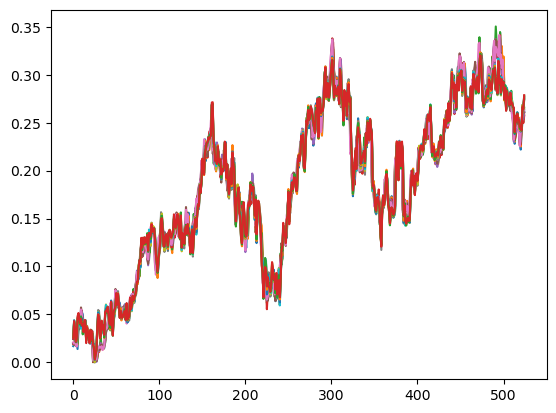

In [127]:
plt.plot(y_train)
plt.plot(train_output)

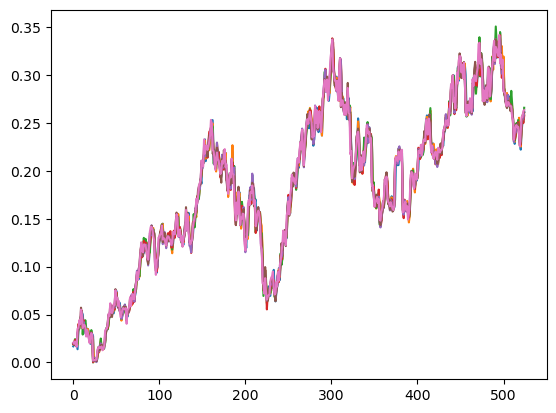

In [128]:
plt.plot(y_train)

In [129]:
obj.train_Mae_find(train_output,y_train)

 Training mae: 0.010432387881199223


C:\Users\salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.010432387881199223

In [130]:
test_pred=obj.predict(x_test)

In [131]:
obj.test_Mae_find(test_pred,y_test)

 Testing mae: 0.3021820084812275


C:\Users\salma\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3021820084812275

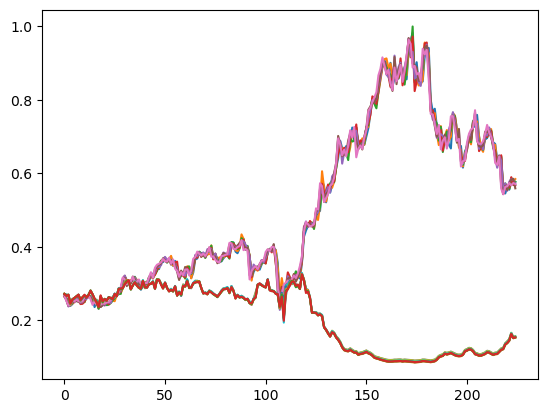

In [132]:
plt.plot(y_test)
plt.plot(test_pred)

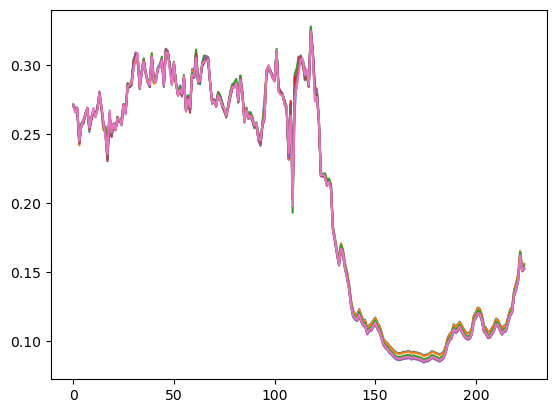

In [133]:
plt.plot(test_pred)

In [134]:

x=obj.best_pram(x_train,y_train)
print("best hidden nodes ",x)

weight matrix shape (30, 100)
bias shape (100,)
bias2 shape (7,)
weight matrix shape (30, 100)
bias shape (100,)
bias2 shape (7,)
X matrix shape  (420, 30)
y matrix shape (420, 7)
bias [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
ouput of h  [[1.82604861 1.87964894 1.94205168 ... 2.1655975  2.0376088  2.01110729]
 [1.81690856 1.87230478 1.9202509  ... 2.19583028 2.03221068 2.04342115]
 [1.80505181 1.87864919 1.90481331 ... 2.16308727 2.00329016 1.99416797]
 ...
 [3.21058456 3.36384945 3.42147779 ... 3.83441302 3.57136393 3.55125333]
 [3.24212332 3.36075527 3.45159046 ... 3.82016313 3.60039524 3.58087555]
 [3.3207663  3.40747199 3.50975997 ... 3.90656676 3.68644208 3.6624715 ]]
H matrix shape (420, 100)
shape of h after sigmoid (4

C:\Users\salma\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\salma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\salma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\salma\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\salma\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\salma\anaconda3\lib\site-